In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def isEqualComplex(a, b):
    return math.isclose(a.real, b.real) and math.isclose(a.imag, b.imag)

In [3]:
def get_root(init_root):
    cur_root = init_root
    for _ in range(100):
        new_root = 2 * cur_root / 3 + 1/(3*cur_root*cur_root)        
        if isEqualComplex(new_root, cur_root):
            return new_root
        cur_root = new_root
    return cur_root

In [4]:
roots = [complex(1, 0), complex(-0.5, math.sqrt(3)/2), complex(-0.5, -math.sqrt(3)/2)]

In [5]:
def get_class_by_root(cur_root):
    for i, root in enumerate(roots):
        if isEqualComplex(root, cur_root):
            return i
    return -1

In [6]:
def get_class_by_point(i, j):
    try:
        return get_class_by_root(get_root(complex((i - 500)/250, (j - 500)/250)))  
    except ZeroDivisionError:
        return -1

In [7]:
result = np.fromfunction(np.vectorize(lambda i, j: get_class_by_point(i, j)), (1000, 1000), dtype = int)

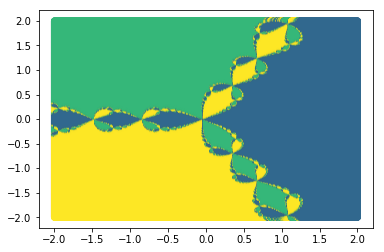

In [8]:
x = np.repeat(np.linspace(-2, 2, 1000), 1000)
y = np.tile(np.linspace(-2, 2, 1000), 1000)
result_plot = plt.scatter(x, y, c=np.ravel(np.asarray(result)))

In [9]:
fig = result_plot.get_figure()
fig.savefig("res.png")